<a href="https://colab.research.google.com/github/anshupandey/Generative-Adversial-Networks/blob/master/facebookresearch_pytorch-gan-zoo_pgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# Progressive Growing of GANs (PGAN)

*Author: FAIR HDGAN*

**High-quality image generation of fashion, celebrity faces**

_ | _
- | -
![alt](https://pytorch.org/assets/images/pgan_mix.jpg) | ![alt](https://pytorch.org/assets/images/pgan_celebaHQ.jpg)

Paper: https://arxiv.org/pdf/1710.10196.pdf

Reference: https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/


### Model Description

In computer vision, generative models are networks trained to create images from a given input. In our case, we consider a specific kind of generative networks: GANs (Generative Adversarial Networks) which learn to map a random vector with a realistic image generation.

Progressive Growing of GANs is a method developed by Karras et. al. [1] in 2017 allowing generation of high resolution images. To do so, the generative network is trained slice by slice. At first the model is trained to build very low resolution images, once it converges, new layers are added and the output resolution doubles. The process continues until the desired resolution is reached.


In [1]:
import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-512',
                       pretrained=True, useGPU=use_gpu)
# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
#                        'PGAN', model_name='celebAHQ-256',
#                        pretrained=True, useGPU=use_gpu)

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/zipball/hub" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth
100%|██████████| 264M/264M [00:04<00:00, 65.3MB/s]


Average network found !


The input to the model is a noise vector of shape `(N, 512)` where `N` is the number of images to be generated.
It can be constructed using the function `.buildNoiseData`.
The model has a `.test` function that takes in the noise vector and generates images.

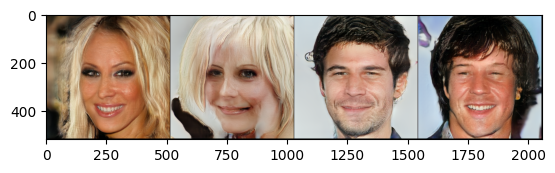

In [2]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()

You should see an image similar to the one on the left.

If you want to train your own Progressive GAN and other GANs from scratch, have a look at [PyTorch GAN Zoo](https://github.com/facebookresearch/pytorch_GAN_zoo).



# Pretrained PGAN: DTD Model

Dataset reference: https://www.robots.ox.ac.uk/~vgg/data/dtd/

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/testDTD_s5_i96000-04efa39f.pth" to /root/.cache/torch/hub/checkpoints/testDTD_s5_i96000-04efa39f.pth
100%|██████████| 266M/266M [00:03<00:00, 75.6MB/s]


Average network found !


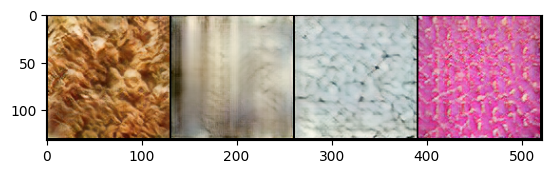

In [4]:
import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='DTD',
                       pretrained=True, useGPU=use_gpu)

num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()

# Pre-trained DCGAN on Fashion Dataset

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/DCGAN_fashionGen-1d67302.pth" to /root/.cache/torch/hub/checkpoints/DCGAN_fashionGen-1d67302.pth
100%|██████████| 39.7M/39.7M [00:00<00:00, 43.7MB/s]


Average network found !


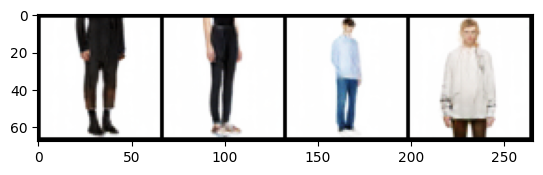

In [6]:
import torch
use_gpu = True if torch.cuda.is_available() else False

# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'DCGAN', model_name='fashionGen',
                       pretrained=True, useGPU=use_gpu)

num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
# plt.show()